In [1]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [5]:
database = pd.read_csv('../data/song_database.csv')

audio_feat = database.drop(columns=['artist','song','uri','duration_ms','tempo','loudness'])

audio_feat.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,27106.000000,27106.000000,27106.000000,27106.000000,27106.000000,27106.000000,27106.000000
mean,0.592510,0.711662,0.085723,0.202407,0.167269,0.210532,0.459730
std,0.146955,0.224924,0.086589,0.278876,0.302745,0.180491,0.252728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.579000,0.037200,0.005960,0.000001,0.094800,0.249000
50%,0.599000,0.766000,0.052500,0.057050,0.000584,0.133000,0.438000
75%,0.695000,0.891000,0.090800,0.301000,0.146000,0.284000,0.659000
max,0.980000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000


In [6]:
audio_scaled = StandardScaler().fit_transform(audio_feat)

pd.DataFrame(audio_scaled,columns=audio_feat.columns)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,-1.657061,-1.021082,-0.487640,2.064011,-0.548555,-0.496054,0.262223
1,-0.228030,-2.439363,-0.407951,2.436943,-0.552464,-0.274432,0.392800
2,1.024073,-1.007744,-0.468006,2.218204,-0.552519,-0.713797,0.206826
3,-0.241640,-1.003298,0.139473,0.773092,-0.552519,0.190972,0.891370
4,1.003658,-0.580925,-0.571948,1.637290,-0.324930,-0.063892,2.015128
...,...,...,...,...,...,...,...
27101,-0.119152,-0.185229,-0.622764,0.504150,-0.552502,-0.451729,1.108999
27102,0.248313,0.677299,-0.597356,-0.324189,0.263365,2.423807,1.971603
27103,0.724657,-1.087772,-0.556934,1.730523,-0.552519,0.578810,1.203964
27104,0.432046,-0.492005,-0.540765,-0.527509,-0.332197,-0.626810,0.460068


### Choosing K with Elbow Method and Silhouette

In [26]:
K = range(6, 20)

inertia = []
silhouette = []

for k in K:
    
    kmeans = KMeans(n_clusters=k,n_init=20,max_iter=200,random_state=1234)
    
    kmeans.fit(audio_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(audio_scaled, kmeans.predict(audio_scaled)))
    
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

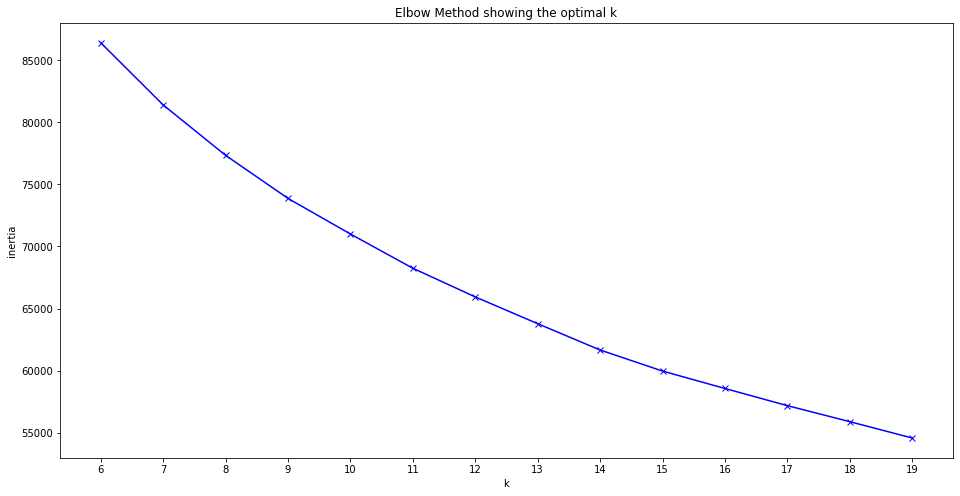

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

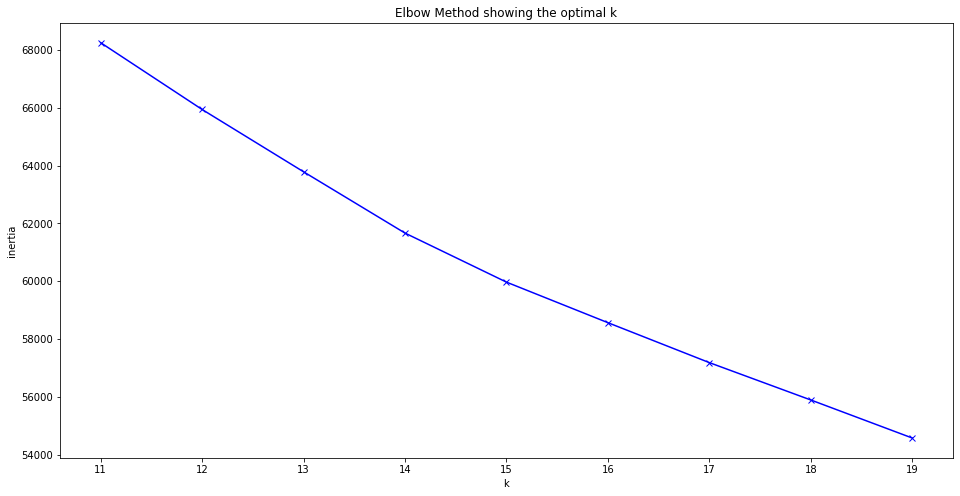

In [33]:
plt.figure(figsize=(16,8))
plt.plot(K[5:], inertia[5:], 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(K[5], max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

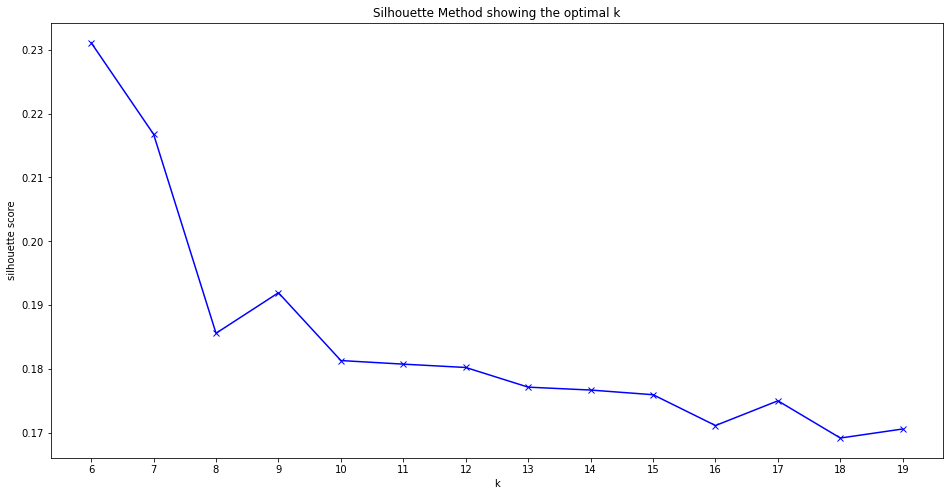

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

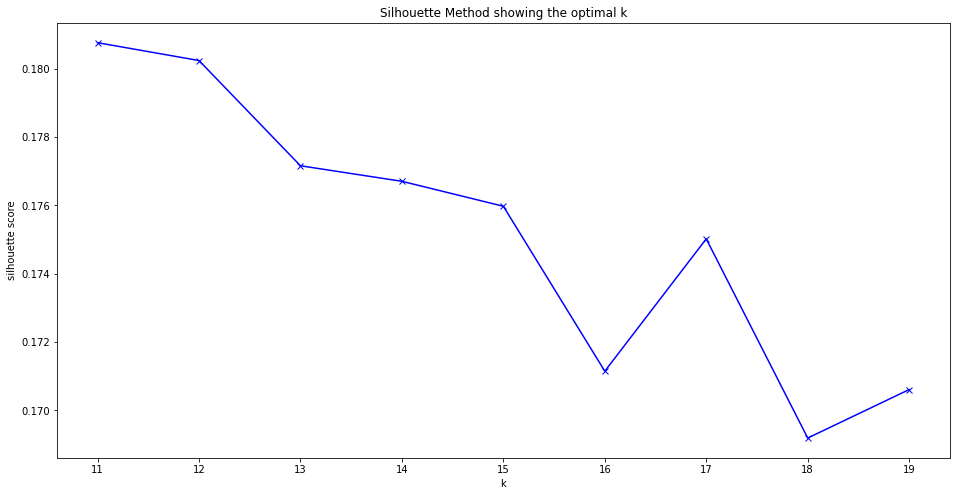

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K[5:], silhouette[5:], 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(K[5], max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Clustering

In [15]:
kmeans_final = KMeans(n_clusters=11,n_init=20,max_iter=200,random_state=1234)

kmeans_final.fit(audio_scaled)

KMeans(max_iter=200, n_clusters=11, n_init=20, random_state=1234)

In [16]:
with open("../data/scaler.pickle", "wb") as f:
    pickle.dump(kmeans_final,f)

In [17]:
clusters = kmeans_final.predict(audio_scaled)
pd.Series(clusters).value_counts().sort_index()

0     4311
1     3468
2     3385
3     2122
4     2124
5     2881
6      691
7     3144
8     1632
9     1115
10    2233
dtype: int64

In [19]:
new_database = database.copy()

new_database['cluster'] = clusters

new_database.to_csv('../data/clustered_database.csv',index=False)

new_database.loc[new_database['cluster']==6]

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
34,Sambolero,Luiz Bonfá,spotify:track:44SPxt26EgxgqhoOCTE7Y2,0.6000,0.02440,-25.019,0.0377,0.965,0.633,0.1070,0.5940,104.647,173160,6
40,O ouro e a madeira,Lula Pena,spotify:track:0qaM3kQL0NNvLVKdLGxY7Y,0.5360,0.18700,-18.813,0.0553,0.887,0.596,0.1090,0.4190,153.970,140387,6
108,Sorriu Para Mim,"Rosa Passos, Ron Carter",spotify:track:4RWArvqdi3dy4Z1VMXdN3T,0.6850,0.28100,-20.799,0.0472,0.866,0.756,0.1060,0.7270,96.592,238000,6
123,Choro No. 11,"Mauricio Einhorn, Sebastiao Tapajós, Altamiro ...",spotify:track:1XCMiWIOAnKnDBO0XQQgHZ,0.5570,0.54700,-4.903,0.0296,0.940,0.945,0.2040,0.8230,141.553,144857,6
124,Odeon,"Raphael Rabello & Dino 7 Cordas, Dino 7 Cordas...",spotify:track:0jSUpQvXu5ngJ9i9oTPGIQ,0.3580,0.46200,-10.322,0.0414,0.883,0.863,0.1120,0.5220,99.679,210960,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26885,Homenaje a Federico Garcia Lorca: II. Duelo,"Silvestre Revueltas, Neal Wolworth, Xalapa Sym...",spotify:track:6022iGIh2KnyBT5eW20G5w,0.1260,0.01960,-23.228,0.0393,0.980,0.780,0.1080,0.0335,69.288,287893,6
26886,Homenaje a Federico Garcia Lorca: III. Son,"Silvestre Revueltas, Neal Wolworth, Xalapa Sym...",spotify:track:6U8eNJ0TjDSlUpulpPEYNN,0.2750,0.30700,-18.558,0.0374,0.913,0.828,0.5700,0.5480,58.234,198933,6
26895,Wolwerine Blues,Aspheim Oldtimers,spotify:track:6byFa7qzErp9Tr67jsXJ9O,0.5110,0.43100,-11.370,0.0704,0.931,0.959,0.0747,0.8860,184.802,285947,6
26912,Concert of Wolwes In Canada's Forests,Natural Sounds,spotify:track:74lCVPIg04nxxalNsC2r6H,0.1670,0.11000,-27.323,0.0489,0.990,0.895,0.1560,0.0378,87.755,371067,6
